# Hybrid Mutant Fund Analysis - 2023

### Aim :
##### To examine different aspects of the Hybrid Mutual Fund dataset and identify differences between successful and unsuccessful schemes.

## What is Hybrid Mutual Fund?
### 

- A hybrid fund is an investment portfolio with diversification across two or more types of assets.
- Typically, these funds invest in a mix of stocks and bonds.
- The term "hybrid" indicates investing in multiple asset classes.
- Investors can access various asset classes through a single hybrid fund.
- Risk tolerance in hybrid funds can vary, ranging from conservative to moderate and aggressive.
- Allocation strategy can be adjusted to align with the investor's risk preference and financial goals.
- Hybrid mutual funds are types of mutual funds that invest in more than one asset class.

In [79]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [121]:
data = pd.read_excel("mf_cleaned.xlsx")

In [122]:
data.head()

,scheme_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Quant Small Cap Fund,5.0,Equity,Small Cap Mutual Funds,5.4,71.4,23.2
1,Quant Tax Plan- Direct Growth,5.0,Equity,ELSS Mutual Funds,0.9,54.9,22.2
2,Quant Infrastructure Fund,5.0,Equity,Sectoral / Thematic Mutual Funds,5.6,61.5,21.1
3,Canara Robeco Small Cap Fund,5.0,Equity,Small Cap Mutual Funds,-0.6,51.8,NaN
4,PGIM India Midcap Opportunities Fund,5.0,Equity,Mid Cap Mutual Funds,2.0,42.9,19.0


In [123]:
data.describe()

# In pandas, the .describe() function is used to generate descriptive statistics of a DataFrame or Series. 
# It provides a summary of central tendency, dispersion, and shape of the distribution of a dataset, excluding NaN (Not a Number) values. 
# The output includes the count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile 
# (Q3), and maximum for numerical data.

,rating,returns_1yr,returns_3yr,returns_5yr
count,765.000000,1432.000000,1204.000000,1002.000000
mean,3.011765,3.612011,19.546429,10.227445
std,1.114454,6.092753,12.068067,3.761283
min,1.000000,-21.200000,2.900000,-6.200000
25%,2.000000,1.700000,6.800000,7.000000
50%,3.000000,3.750000,18.850000,10.900000
75%,4.000000,5.600000,31.350000,13.300000
max,5.000000,130.800000,71.400000,23.200000


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   scheme_name   1651 non-null   object 
 1   rating        765 non-null    float64
 2   category      1651 non-null   object 
 3   sub_category  1651 non-null   object 
 4   returns_1yr   1432 non-null   float64
 5   returns_3yr   1204 non-null   float64
 6   returns_5yr   1002 non-null   float64
dtypes: float64(4), object(3)
memory usage: 90.4+ KB


## Cleaning the value

In [84]:

# # Assuming 'df' is your DataFrame
# # Replace any values outside the 1-5 range with NaN
# data['rating'] = data['rating'].apply(lambda x: x if 1 <= x <= 5 else None)

# # Drop rows with NaN (if needed)
# data.dropna(subset=['rating'], inplace=True)

# # Sort the DataFrame by 'rating' in ascending order
# sorted_df = data.sort_values(by='rating', ascending=True)

# # Print the top 10 rows
# print(sorted_df['rating'][:10])


In [125]:
# we have some missing value so we take average and fill the value with it
# Calculate the average for each row of the specified columns
data['average_returns'] = data[['returns_1yr', 'returns_3yr', 'returns_5yr']].mean(axis=1, skipna=True)

# Fill missing values in the specified columns with the calculated average
columns_to_fill = ['returns_1yr', 'returns_3yr', 'returns_5yr']
for col in columns_to_fill:
    data[col].fillna(data['average_returns'], inplace=True)

# Drop the 'average_returns' column as it was just for calculation
data.drop('average_returns', axis=1, inplace=True)

data.isna().sum()

# still we have some missing values means they dont have returns of 1,3 and 5 years so we will drop it




scheme_name       0
rating          886
category          0
sub_category      0
returns_1yr     218
returns_3yr     218
returns_5yr     218
dtype: int64

In [126]:
data = data.dropna()
data.isna().sum()

scheme_name     0
rating          0
category        0
sub_category    0
returns_1yr     0
returns_3yr     0
returns_5yr     0
dtype: int64

### Adding good coloums

by default we are putting value in good coloums 0 but if it pass the criteria the scheme will be awarded with 1 i.e scheme is good

In [87]:
data['good_scheme'] = 0
data['good_scheme'][:5]

0    0
1    0
2    0
3    0
4    0
Name: good_scheme, dtype: int64

# Skewness:
In pandas, the `.skew()` function is used to calculate the skewness of a dataset or a specific Series within a DataFrame. Skewness measures the asymmetry of the probability distribution of real-valued random variables about their mean. It gives insights into the shape and tail of the distribution.

Skewness can be positive, negative, or zero:
- **Positive skew (right-skewed):** The right tail is longer or fatter than the left tail. 
    The mean and median will typically be greater than the mode.
- **Negative skew (left-skewed):** The left tail is longer or fatter than the right tail. 
    The mean and median will typically be less than the mode.
- **Zero skew:** The distribution is perfectly symmetrical.

The `.skew()` function calculates the skewness for numerical data. If you call it on a DataFrame, it will calculate the skewness for each 
numerical column. If you call it on a Series, it will calculate the skewness for that specific Series.

Here's an example of how you might use it:

```python
import pandas as pd

# Create a DataFrame
data = {'A': [1, 2, 3, 4, 5],
        'B': [10, 20, 15, 25, 30]}
df = pd.DataFrame(data)

# Calculate skewness for each column
skewness = df.skew()
print(skewness)
```

This will print the skewness for each numerical column in the DataFrame `df`. The higher the absolute value of the skewness, the more 
asymmetrical the distribution is.


# Now lets understand more easy way
## What is skew?
Alright! Imagine we have a bunch of numbers, like scores in a game. When we arrange these numbers in order from the smallest to the 
largest, we can look at how the numbers are spread out.

- **Skew is like describing how the numbers are leaning or stretching:**
  
  - If most of the scores are on the lower side, but a few are really high, it's like the numbers are leaning to the right, and we call 
    this "positive skew."
  
  - If most of the scores are on the higher side, but a few are really low, it's like the numbers are leaning to the left, and we call this 
    "negative skew."
  
  - If the scores are evenly spread, not leaning anywhere, it's like having a balanced line, and we call this "no skew" or "zero skew."

So, skew is a way to tell if our numbers are mostly on one side or the other, or if they're spread out evenly. It's like saying if our data 
is leaning to the right, leaning to the left, or standing straight and balanced. 📊👍


## What is Positive and Negative skew?
Sure! Let's imagine we have a bunch of numbers, and we're trying to understand how they are arranged.

1. **Positive Skew (Right Skew):**
   - Imagine we have a bunch of kids lined up by their height. Now, if most of the kids are a bit shorter, but there are a few very tall 
    kids that make the line look longer on one side (the right side), we call it "leaning to the right" or having a "happy face" shape. The 
    tallest kids (outliers) make the line longer on that side. This is like having more ice cream scoops on one side of a cone.


2. **Negative Skew (Left Skew):**
   - Now, let's think about the opposite. If most of the kids are a bit taller, but there are a few very short kids that make the line look 
     longer on the other side (the left side), we call it "leaning to the left" or having a "sad face" shape. The shortest kids (outliers) 
     make the line longer on that side. This is like having more ice cream scoops on one side of a cone, but this time it's the other side.


So, positive skew is like having a longer line of kids with a few really tall ones making it even longer on one side, and negative skew 
is like having a longer line with a few really short ones making it longer on the other side! It's all about how our "line" of data is leaning 
or stretching.

In [88]:
data.skew()

C:\Users\Amit\AppData\Local\Temp\ipykernel_14116\1188251951.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



rating          0.073486
returns_1yr    10.961371
returns_3yr     0.640742
returns_5yr     0.970046
good_scheme     0.000000
dtype: float64

## 1-3-5 years returns:
"Return" represents the change in the value of an investment over a specific time frame, expressed as a percentage increase or 
decrease in its value.

C:\Users\Amit\AppData\Local\Temp\ipykernel_14116\2730979992.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Amit\AppData\Local\Temp\ipykernel_14116\2730979992.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Amit\AppData\Local\Temp\ipykernel_14116\2730979992.py:9: UserWarning:



`distplot` is a 

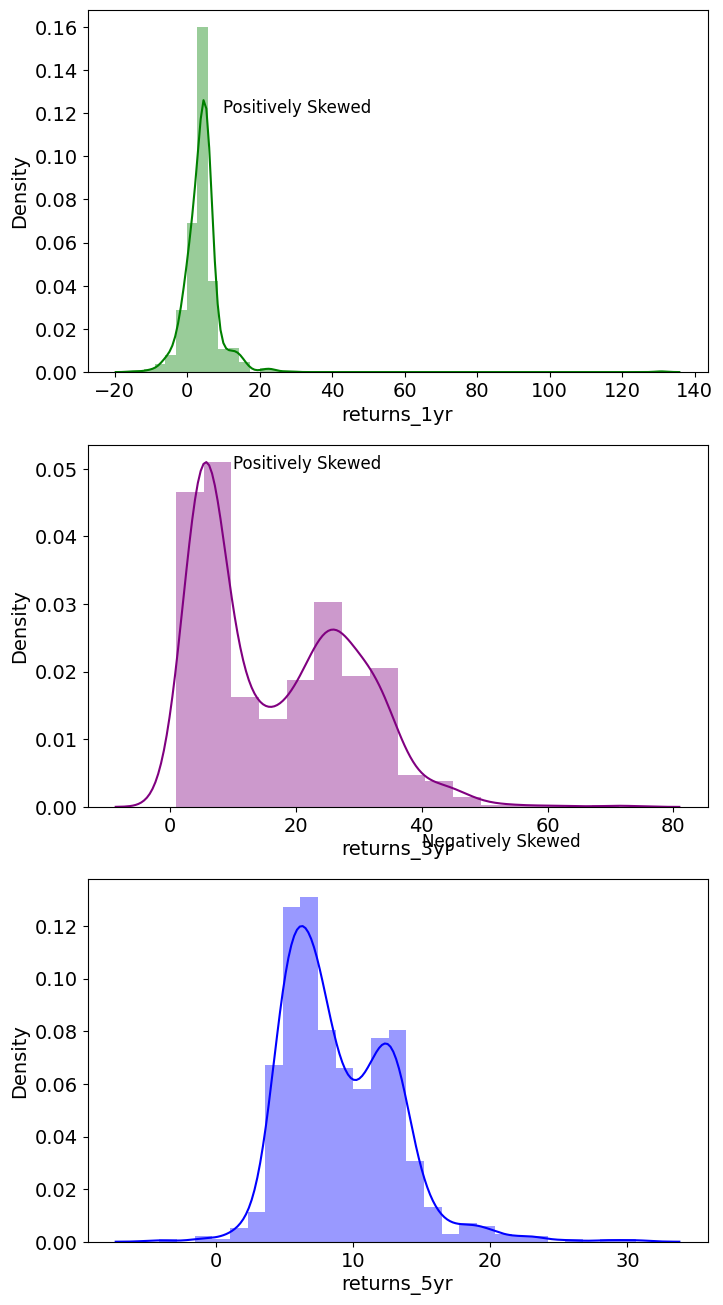

In [89]:
skew_labels=["Positively Skewed","Positively Skewed","Negatively Skewed"]
fig,ax =plt.subplots(3,1, figsize=(8,16)) # 1 - refer number of row , 3 - refer number of coloumns i.e 3 diagram in one row
sb.distplot(data['returns_1yr'],ax=ax[0],color='green');# first diagram
ax[0].text(10.0,.12,skew_labels[0],fontsize=12)

sb.distplot(data['returns_3yr'],ax=ax[1],color='purple'); # second diagram
ax[1].text(10.0,.05,skew_labels[0],fontsize=12)

sb.distplot(data['returns_5yr'],ax=ax[2],color='blue'); # third diagram
ax[2].text(15.0,.150,skew_labels[2],fontsize=12)



plt.show()

In [90]:
data.columns.to_list()

['scheme_name',
 'rating',
 'category',
 'sub_category',
 'returns_1yr',
 'returns_3yr',
 'returns_5yr',
 'good_scheme']

## Kurtosis

Kurtosis is a statistical measure that helps us understand the shape of the distribution of a dataset, specifically focusing on the tails or extremes of the distribution. It provides insights into whether the data points are more or less dispersed in the tails compared to a normal distribution.

There are two main types of kurtosis: positive (leptokurtic) and negative (platykurtic).

1. **Positive Kurtosis (Leptokurtic):**
   - A distribution with positive kurtosis, also known as leptokurtic, has fatter tails and a sharper peak compared to a normal distribution.
   - In a leptokurtic distribution, there are more data points in the tails, indicating a higher probability of extreme values or outliers.
   - This type of distribution often arises in financial markets, where extreme events, like market crashes or sudden price spikes, are more common than what a normal distribution would predict.

2. **Negative Kurtosis (Platykurtic):**
   - A distribution with negative kurtosis, also known as platykurtic, has thinner tails and a flatter peak compared to a normal distribution.
   - In a platykurtic distribution, extreme values are less likely to occur, and the data points are more clustered around the mean.
   - This type of distribution is often seen in stable and less volatile markets or when dealing with less unpredictable phenomena.

In simpler terms:

- **Positive Kurtosis (Leptokurtic):**
  - Tails of the distribution are fatter, indicating more extreme values. 
  - The data points are more spread out from the mean, suggesting higher volatility or risk.

- **Negative Kurtosis (Platykurtic):**
  - Tails of the distribution are thinner, indicating fewer extreme values.
  - The data points are more clustered around the mean, suggesting lower volatility or risk.

Understanding the kurtosis of a dataset helps in risk assessment, portfolio management, pricing of financial instruments, and decision-making in various fields where understanding the distribution of data is crucial.


#### Shape of it


##### Positive Kurtosis (Leptokurtic):
- Imagine a histogram or a line plot where the center peak is tall and the tails on both sides extend higher and are more pronounced than a standard bell curve. The tails are "fatter" than a normal distribution.


##### Negative Kurtosis (Platykurtic):
- Picture a flatter histogram or line plot where the center peak is shorter, and the tails on both sides are thinner and do not extend as high as a standard bell curve. The tails are "thinner" than a normal distribution.


## Where it used generally

1. **Finance and Risk Assessment:**
   - In finance, kurtosis helps assess the risk associated with an investment. 
   - A higher kurtosis (leptokurtic) indicates more extreme price movements, implying a riskier investment with potential for larger gains but also larger losses due to the fatter tails.

2. **Insurance and Actuarial Science:**
   - In insurance, kurtosis is vital for understanding the probability of extreme events (e.g., natural disasters) and pricing insurance policies accordingly.
   - A leptokurtic distribution suggests a higher likelihood of extreme, costly events, affecting insurance premiums.

3. **Stock Market Analysis:**
   - Kurtosis is used to analyze stock price movements. A leptokurtic distribution may imply a higher probability of significant price swings, affecting investment strategies and risk management.

4. **Economics and Price Movements:**
   - In economics, kurtosis helps model price movements of commodities or goods.
   - For example, in the pricing of essential goods, a leptokurtic distribution may indicate higher volatility and uncertainty in pricing.

5. **Biostatistics and Health Sciences:**
   - In biostatistics, kurtosis helps analyze data distributions related to health and diseases.
   - For instance, a leptokurtic distribution in a study analyzing disease occurrence might suggest a higher likelihood of extreme cases.

In practical terms, understanding kurtosis allows professionals to anticipate and plan for extreme events or outcomes. It's an essential tool for risk assessment, decision-making, and tailoring strategies to better align with the distribution of data in various domains.


# In short and simple
### Kurtosis Greater than +1:

When the kurtosis value is greater than +1, it indicates a distribution with heavier tails and a sharper peak (leptokurtic distribution).
This suggests that the dataset has a higher probability of extreme values or outliers compared to a normal distribution.

### Kurtosis Less than -1:

When the kurtosis value is less than -1, it indicates a distribution with lighter tails and a flatter peak (platykurtic distribution).
This suggests that the dataset has fewer extreme values or outliers compared to a normal distribution.
So, in the revised interpretation, a kurtosis less than -1 indicates a platykurtic distribution, which means the distribution is flatter and has lighter tails compared to a normal distribution.





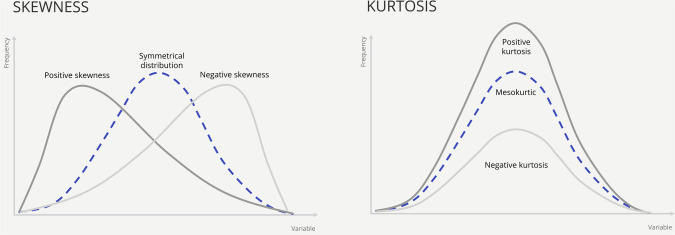

In [91]:
from IPython.display import Image
Image('kurtosis.jpg')

In [92]:
data.kurt()

C:\Users\Amit\AppData\Local\Temp\ipykernel_14116\2907027414.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



rating          -0.674922
returns_1yr    216.966931
returns_3yr     -0.294257
returns_5yr      2.157548
good_scheme      0.000000
dtype: float64

In [93]:
data.isna().sum()

scheme_name     0
rating          0
category        0
sub_category    0
returns_1yr     0
returns_3yr     0
returns_5yr     0
good_scheme     0
dtype: int64

In [94]:
# It returns the list of items that are unique in coloumn in 'category'
category = data['category'].unique().tolist()
category

['Equity', 'Hybrid', 'Solution Oriented', 'Other', 'Debt']

In [95]:
category_freq = data['category'].value_counts().to_dict()
# It return count of each unique item in form of dictionary
category_freq

{'Debt': 305,
 'Equity': 244,
 'Hybrid': 120,
 'Other': 72,
 'Solution Oriented': 24}

In [96]:
# Function to return list of categories
def getList(category_frequency): 
    list = [] 
    for value in category_frequency.values(): 
        list.append(value) 
          
    return list

category_count = getList(category_freq) 
# this is to return list of values obtained in dictionary
category_count

[305, 244, 120, 72, 24]

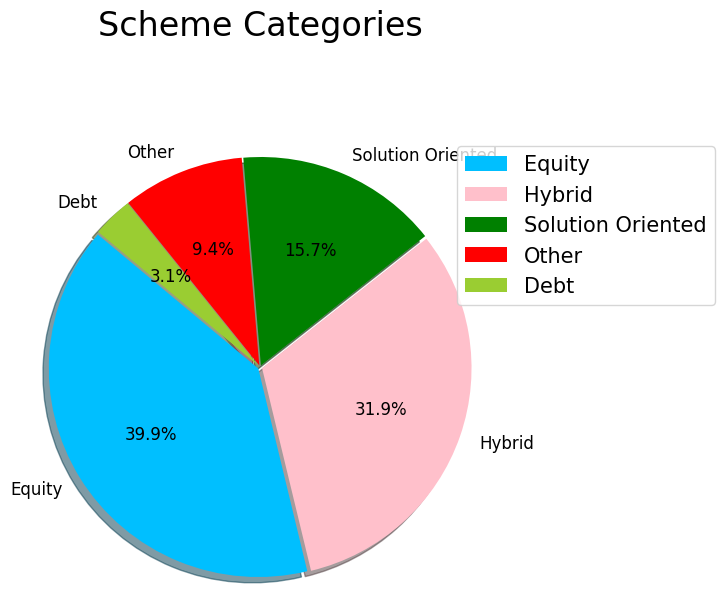

In [128]:
colors = ['deepskyblue','pink','green','red','yellowgreen']
explode = (0.01,0.01,0.01,0.01,0.01)

# Plotting pie chart for categories
plt.pie(category_count, explode=explode, labels=category, colors=colors, shadow=True, startangle=140, autopct='%1.1f%%')
plt.title('Scheme Categories', y=1.20, fontsize='24')
plt.legend(category,loc='upper right', bbox_to_anchor=(1.50,1.0), fontsize=15)
plt.axis('equal')
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['font.size'] = 12
plt.show()


**Equity:**
1. **Ownership Stake:** Equity represents ownership in a company or asset. When you own equity in a company, you have a stake in its ownership and potential profits.
2. **Risk and Reward:** Investing in equity involves higher risk compared to other categories. The potential for high returns is also significant if the company performs well and its value increases.
3. **Long-Term Investment:** Equity investments are typically considered long-term investments, aiming to benefit from the growth and success of the company over an extended period.

**Hybrid:**
1. **Blend of Assets:** Hybrid funds combine different asset classes like equities, bonds, and sometimes other securities to provide investors with a diversified portfolio.
2. **Risk Management:** The blend of assets allows for a balance between potential high returns (from equities) and stability (from bonds), managing overall risk.
3. **Flexibility:** Hybrid funds offer flexibility for investors to adjust their portfolio based on market conditions, enabling them to align with their risk tolerance and financial goals.

**Solution Oriented:**
1. **Goal-Centric:** These funds are designed to meet specific financial goals, such as retirement planning, child education, or buying a house, offering a structured approach to investment.
2. **Lock-In Period:** Solution-oriented funds often have a lock-in period, ensuring that investors stay committed to achieving their financial objectives by discouraging premature withdrawals.
3. **Tax Benefits:** In some regions, investments in solution-oriented funds may provide tax benefits, encouraging long-term savings towards targeted financial goals.

**Other:**
1. **Diverse Asset Classes:** This category encompasses a broad range of investment options outside of equity, hybrid, and debt, such as commodities, real estate, structured products, or alternative investments.
2. **Tailored Strategies:** "Other" investments often involve specialized strategies to achieve specific objectives, which may include hedging against inflation, generating regular income, or benefiting from unique market conditions.
3. **Varied Risk Levels:** The risk associated with "other" investments can vary widely based on the specific asset or strategy, making it important for investors to understand the risk profile and align it with their risk tolerance.

**Debt:**
1. **Fixed Income:** Debt instruments like bonds, government securities, and corporate loans form the basis of debt investments, providing regular interest payments to investors.
2. **Lower Risk:** Debt investments are generally considered lower risk compared to equities, making them suitable for investors seeking a stable and predictable stream of income.
3. **Maturity and Principal Return:** Debt investments have a predetermined maturity date, and at maturity, the principal amount invested is returned to the investor along with any accrued interest.

In [98]:
data.columns.to_list()

['scheme_name',
 'rating',
 'category',
 'sub_category',
 'returns_1yr',
 'returns_3yr',
 'returns_5yr',
 'good_scheme']

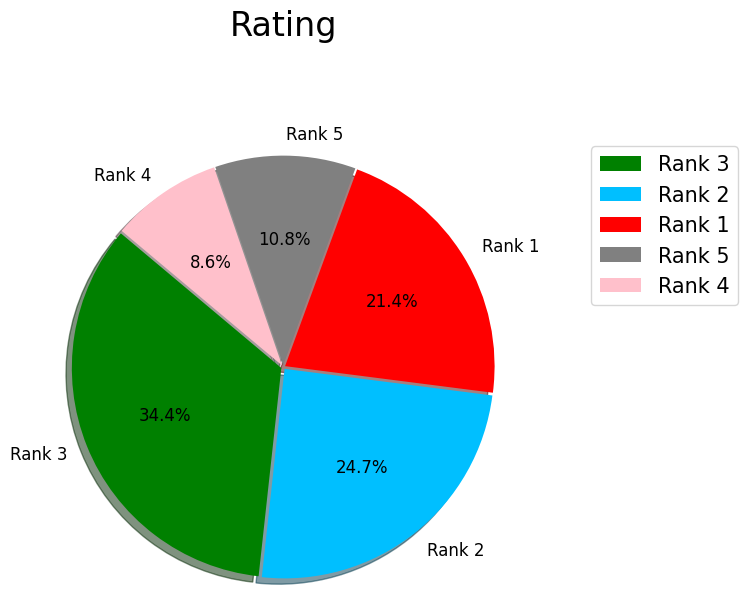

In [99]:
rank=data['rating'].unique().tolist() #It returns list of items that are unique in the column "Crisil_Rating"
#print(rank)
rank_frequency = data['rating'].value_counts().to_dict() #It returns the count of each unique item in the form of dictionary
#print(rank_frequency)
count = rank_frequency.values() #It returns the "values" in key:value (unique item : frequency) pair of dictionary obtained in last line.
#print(count)

# function returns the list of rank_frequency
def getList(rank_frequency): 
    list = [] 
    for value in rank_frequency.values(): 
        list.append(value) 
          
    return list
      
rank_count=getList(rank_frequency) #This is to return list of values obtained in the dictionary.

#print(rank_count)

labels = ['Rank 3', 'Rank 2', 'Rank 1', 'Rank 5', 'Rank 4']
colors = ['green','deepskyblue','red', 'grey', 'pink']
explode = (0.01, 0.01, 0.01, 0.01, 0.01)  

# plot pie chart for crisil data
plt.pie(rank_count, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140, autopct='%1.1f%%')
plt.title('Rating', y=1.20, fontsize='24')
plt.axis('equal')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize']=(6,6)
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.50,1.0), fontsize=15)
plt.show()

In [129]:
data.head()

,scheme_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Quant Small Cap Fund,5.0,Equity,Small Cap Mutual Funds,5.4,71.4,23.2
1,Quant Tax Plan- Direct Growth,5.0,Equity,ELSS Mutual Funds,0.9,54.9,22.2
2,Quant Infrastructure Fund,5.0,Equity,Sectoral / Thematic Mutual Funds,5.6,61.5,21.1
3,Canara Robeco Small Cap Fund,5.0,Equity,Small Cap Mutual Funds,-0.6,51.8,25.6
4,PGIM India Midcap Opportunities Fund,5.0,Equity,Mid Cap Mutual Funds,2.0,42.9,19.0


###  Rating Explained:
Rating is a method used to evaluate mutual funds and understand how well they are managed and performing. This evaluation is based on the best practices globally and considers various aspects of the mutual fund's portfolio and performance.

The evaluation involves analyzing a combination of Net Asset Value (NAV) and portfolio-based attributes. Here's what these terms mean:
- **Net Asset Value (NAV)**: It's the value of each unit of the mutual fund. It's calculated by dividing the total value of all the securities in the portfolio by the total number of units issued to investors.
  
- **Portfolio-based Attributes**: These are characteristics of the mutual fund's investments, including asset allocation, asset concentration, liquidity (how easy it is to buy or sell), and the overall quality of the assets held by the fund.

By considering these factors, rating offers a comprehensive analysis of mutual funds. The goal is to provide investors with a clear and simple understanding of how a particular mutual fund is likely to perform based on these critical parameters.

### -> Understanding the Pie Chart:
Let's break down the pie chart to understand the distribution of schemes based on their Crisil ratings in more detail.

Imagine you have a total of 30 different mutual fund schemes. Each scheme is assigned a rank or Crisil rating, ranging from 1 (the highest) to 5 (the lowest). Now, let's look at how these schemes are distributed in the pie chart, based on their respective ratings:

- **Rank 1 (10%)**: This category represents the highest-rated schemes, making up 10% of the total. These funds are deemed to be very well managed and have strong performance indicators.

- **Rank 2 (24.7%)**: The next level includes 33.3% of your total schemes. These funds are also rated well and have good management practices.

- **Rank 3 (34.4%)**: Nearly half of your total schemes, 40% to be exact, fall into this category. These funds are considered to have a moderate level of performance and management quality.

- **Rank 4 (8.6%)**: A smaller portion, 6.7%, consists of funds in this category. These are rated lower and might have some room for improvement in terms of performance and management.

- **Rank 5 (10.8%)**: Similar to rank 1, this category also represents 10% of the total schemes. These funds are rated the lowest and may require careful consideration before investing due to their lower performance and management rating.

This pie chart provides a visual representation of how your schemes are distributed across different Crisil ratings, giving you valuable insights into the overall quality and performance of your mutual fund portfolio.

In [101]:
data.head()

,scheme_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr,good_scheme
0,Quant Small Cap Fund,5.0,Equity,Small Cap Mutual Funds,5.4,71.4,23.2,0
1,Quant Tax Plan- Direct Growth,5.0,Equity,ELSS Mutual Funds,0.9,54.9,22.2,0
2,Quant Infrastructure Fund,5.0,Equity,Sectoral / Thematic Mutual Funds,5.6,61.5,21.1,0
3,Canara Robeco Small Cap Fund,5.0,Equity,Small Cap Mutual Funds,-0.6,51.8,25.6,0
4,PGIM India Midcap Opportunities Fund,5.0,Equity,Mid Cap Mutual Funds,2.0,42.9,19.0,0


In [102]:
rank=data['rating'].unique().tolist() #It returns list of items that are unique in the column "Crisil_Rating"
#print(rank)
rank_frequency = data['rating'].value_counts().to_dict() #It returns the count of each unique item in the form of dictionary
#print(rank_frequency)
count = rank_frequency.values() #It returns the "values" in key:value (unique item : frequency) pair of dictionary obtained in last line.
#print(count)

# function returns the list of rank_frequency
def getList(rank_frequency): 
    list = [] 
    for value in rank_frequency.values(): 
        list.append(value) 
          
    return list
      
rank_count=getList(rank_frequency) 
rank_count

[263, 189, 164, 83, 66]

## 1 Year Return


##### As data is more than 750 so we are taking here only first 50

In [103]:
data.head()

,scheme_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr,good_scheme
0,Quant Small Cap Fund,5.0,Equity,Small Cap Mutual Funds,5.4,71.4,23.2,0
1,Quant Tax Plan- Direct Growth,5.0,Equity,ELSS Mutual Funds,0.9,54.9,22.2,0
2,Quant Infrastructure Fund,5.0,Equity,Sectoral / Thematic Mutual Funds,5.6,61.5,21.1,0
3,Canara Robeco Small Cap Fund,5.0,Equity,Small Cap Mutual Funds,-0.6,51.8,25.6,0
4,PGIM India Midcap Opportunities Fund,5.0,Equity,Mid Cap Mutual Funds,2.0,42.9,19.0,0


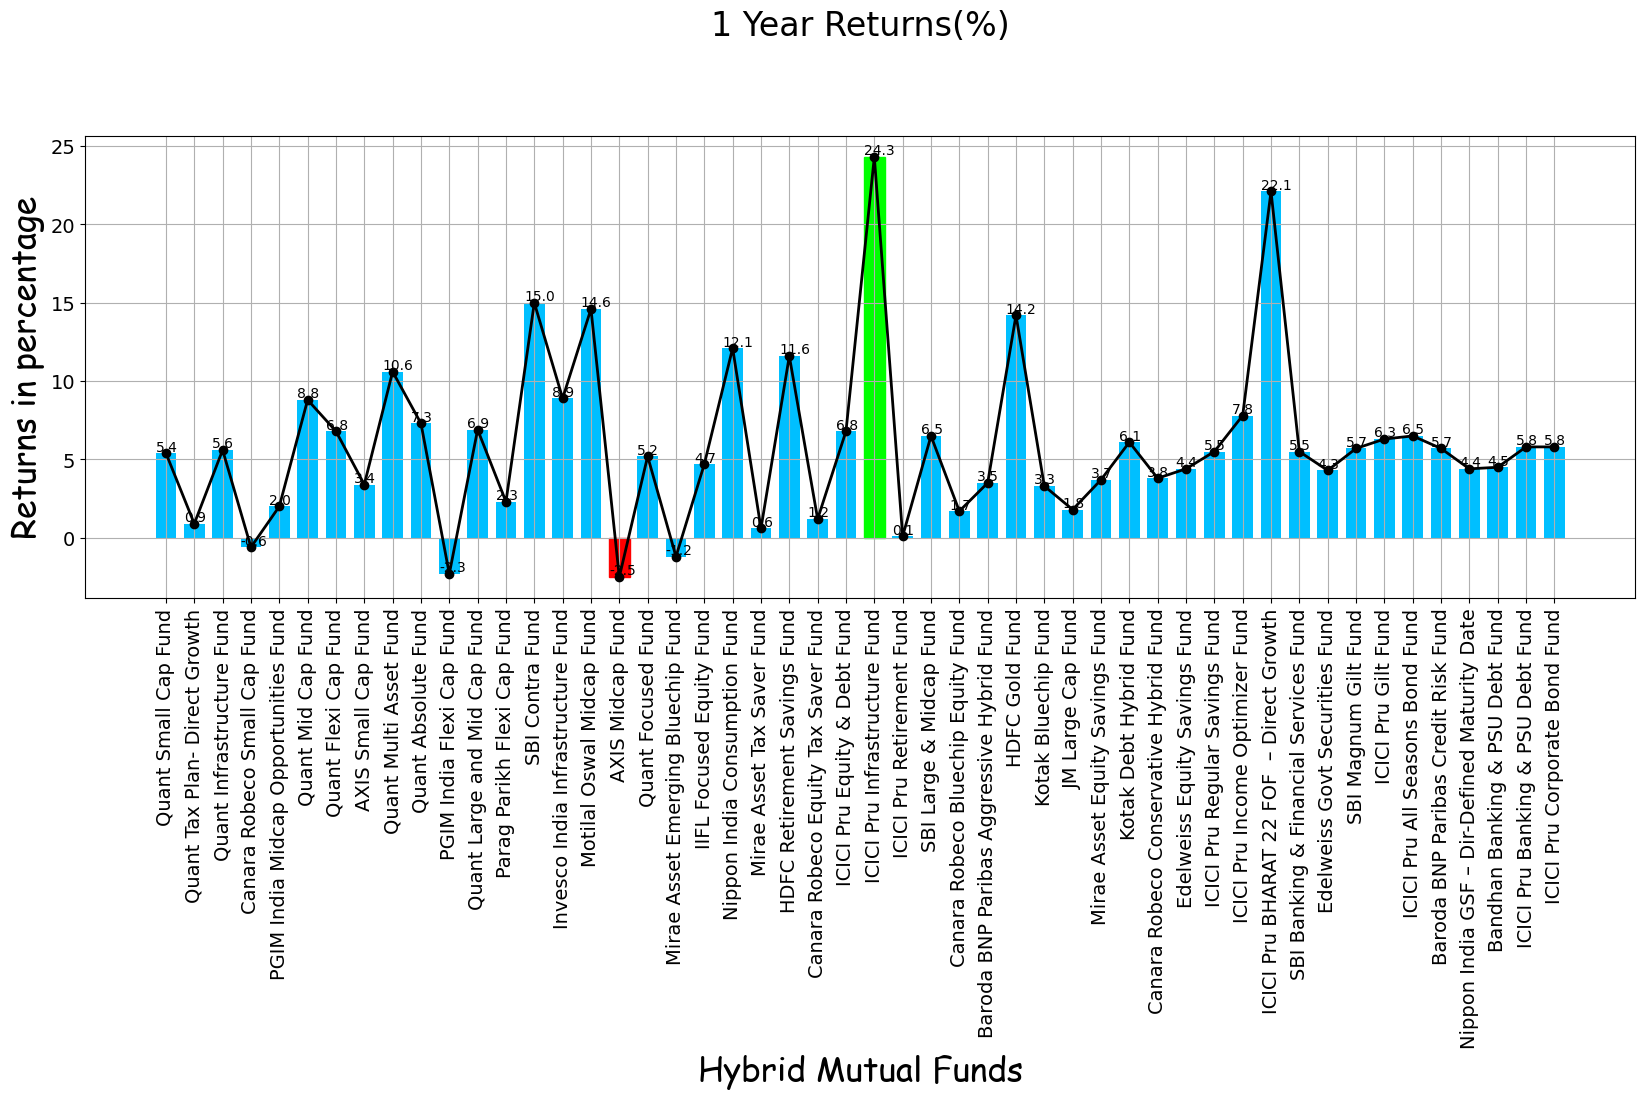

In [132]:
# X represents the fund scheme names
X = data['scheme_name'][:50]

# Y represents the 1-year returns for the funds
Y = data['returns_1yr'][:50]

# Create a bar chart with fund scheme names on the x-axis and 1-year returns on the y-axis
bars = plt.bar(X, Y, color='deepskyblue', width=0.73)

# Highlight the lowest and highest returns bars with different colors
bars[data['returns_1yr'][:50].idxmin()].set_color('red')
bars[data['returns_1yr'][:50].idxmax()].set_color('lime')

# Set the title and labels for the chart
plt.title('1 Year Returns(%)', y=1.20, fontsize=24)
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS")

# Plot the data points for fund scheme names and 1-year returns
plt.plot(X, Y, linewidth=2.0, color='black', marker='o', markersize=6)


# Add a grid to the chart and rotate x-axis labels vertically for better readability
plt.grid()
plt.xticks(X, rotation='vertical')

# Set the figure size and font size
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14

# Add labels with the 1-year returns above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.15, yval, fontsize=10)


plt.show()

In [105]:
len(data['scheme_name'])

765

### As the length is more than 750 so we will use plotly

In [106]:
import plotly.graph_objects as go

# X represents the fund scheme names
X = data['scheme_name']

# Y represents the 1-year returns for the funds
Y = data['returns_1yr']

# Create an interactive bar chart
fig = go.Figure()

# Add bar trace
fig.add_trace(go.Bar(
    x=X,
    y=Y,
    marker_color='deepskyblue'
))

# Find the indices of lowest and highest returns
min_return_index = Y.idxmin()
max_return_index = Y.idxmax()

# Recreate the trace with updated colors for lowest and highest returns bars
fig.data = []  # Clear existing data
colors = ['red' if i == min_return_index else 'lime' if i == max_return_index else 'deepskyblue' for i in range(len(Y))]
fig.add_trace(go.Bar(
    x=X,
    y=Y,
    marker_color=colors
))

# Customize the layout
fig.update_layout(
    title='1 Year Returns(%)',
    xaxis=dict(title='Hybrid Mutual Funds'),
    yaxis=dict(title='Returns in percentage'),
)

# Add data points for fund scheme names and 1-year returns
fig.add_trace(go.Scatter(
    x=X,
    y=Y,
    mode='markers',
    marker=dict(
        color='black',
        size=6,
        symbol='circle'
    ),
    line=dict(color='black', width=2.0)
))

# Add labels with the 1-year returns above each bar
for i, y_val in enumerate(Y):
    fig.add_annotation(
        text=str(y_val),
        x=X[i],
        y=y_val + 0.15,
        showarrow=False,
        font=dict(size=10)
    )

# Show the interactive chart
fig.show()


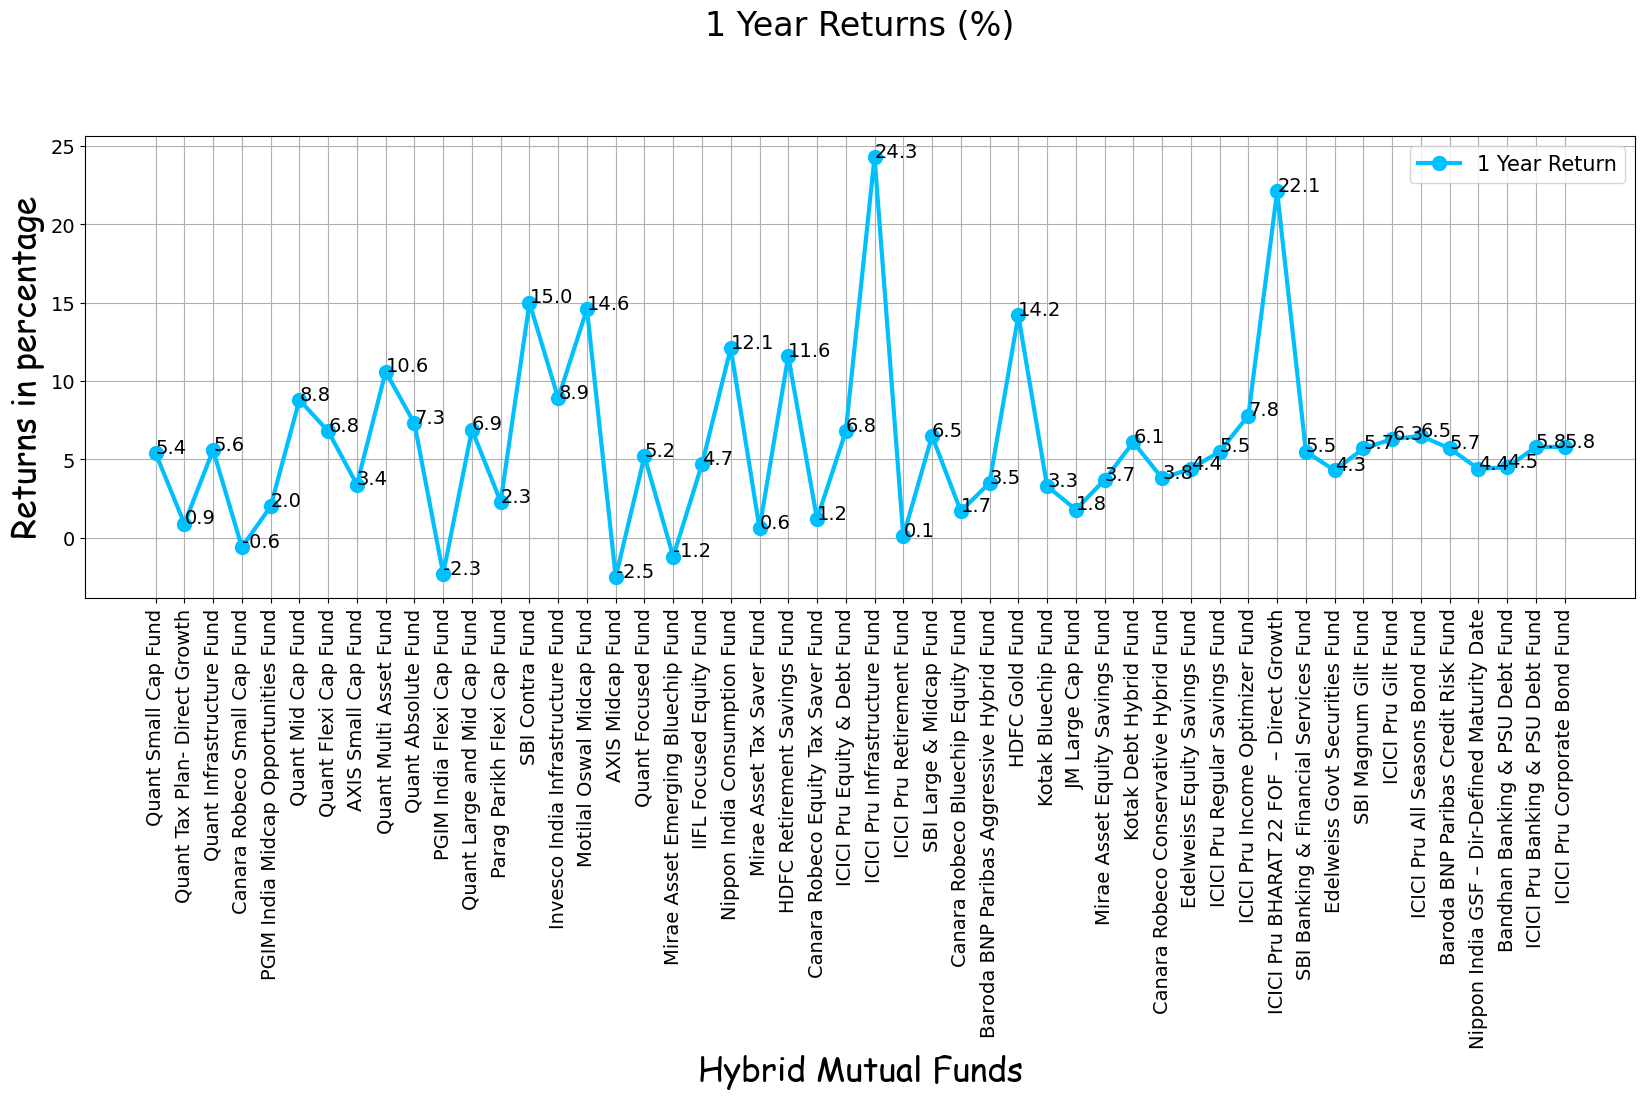

In [107]:
# Extracting 1-year return data
returns = data['returns_1yr'][:50]
X = data['scheme_name'][:50]


# Creating a line plot with annotations
plt.plot(X, returns, linewidth=3.0, color='deepskyblue', marker='o', markersize=10)

# Adding labels and title
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('1 Year Returns (%)', y=1.20, fontsize=24)

# Adding legend and customizing
labels = ['1 Year Return']
plt.legend(labels, loc='upper right', fontsize=15)

# Rotating x-axis labels and adding a grid
plt.xticks(X, rotation='vertical')
plt.grid()

# Annotating data points on the plot
# str(j): Converts the value j (1-year return for a specific mutual fund) to a string, so it can be displayed as text.
# xy=(i, j): Specifies the point where the annotation will be placed, using the (x, y) coordinates.
# i is the x-coordinate (representing the hybrid mutual fund), and j is the y-coordinate (representing the 1-year return).
# The purpose of using annotate() in this code is to display the 1-year return value for each hybrid mutual fund at its 
# respective position on the plot. This provides a clear and visual representation of the exact numerical values corresponding to each data point, 
# aiding in data interpretation and analysis.
for i, j in zip(X, returns):
    plt.annotate(str(j), xy=(i, j))

# Setting figure size and font size
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14

# Displaying the plot
plt.show()


From the above graphs we have taken first 50 but lets find which fund has most 1_year_returns

In [108]:

most_return_1_year = data['returns_1yr'].idxmax()
less_return_1_year = data['returns_1yr'].idxmin()

most_scheme_name = data.loc[most_return_1_year, 'scheme_name']
less_scheme_name = data.loc[less_return_1_year, 'scheme_name']

print("Scheme with the most return in the past year:", most_scheme_name)
print("Scheme with the least return in the past year:", less_scheme_name)


Scheme with the most return in the past year: Bank of India Credit Risk Fund
Scheme with the least return in the past year: AXIS Focused 25 Fund


In [109]:
#  Returning serial number of scheme located in excel
most_return_1_year,less_return_1_year

(73, 529)

### 3 Year Return

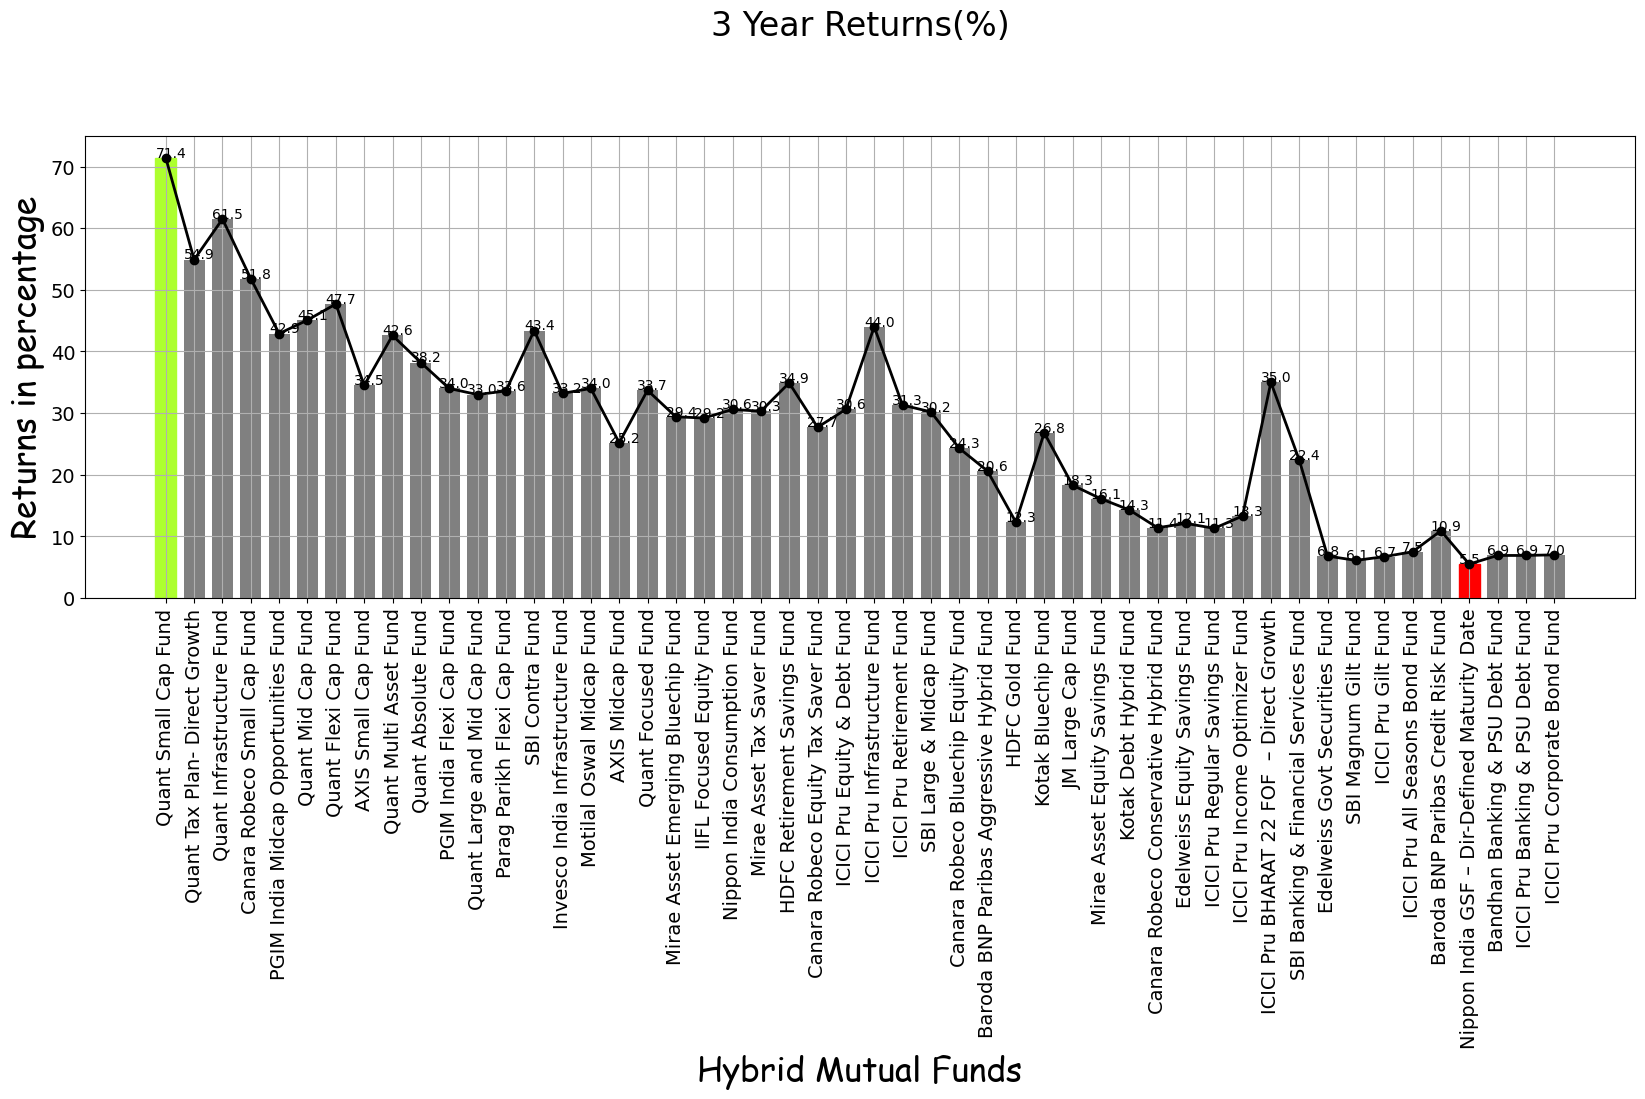

In [110]:
Y=data['returns_3yr'][:50]
#Y.head(5)

bars = plt.bar(X,Y, color='grey', width=0.73)
bars[data['returns_3yr'][:50].idxmin()].set_color('red')
bars[data['returns_3yr'][:50].idxmax()].set_color('greenyellow')
plt.plot(X, Y, linewidth='2.0', color='black', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('3 Year Returns(%)', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

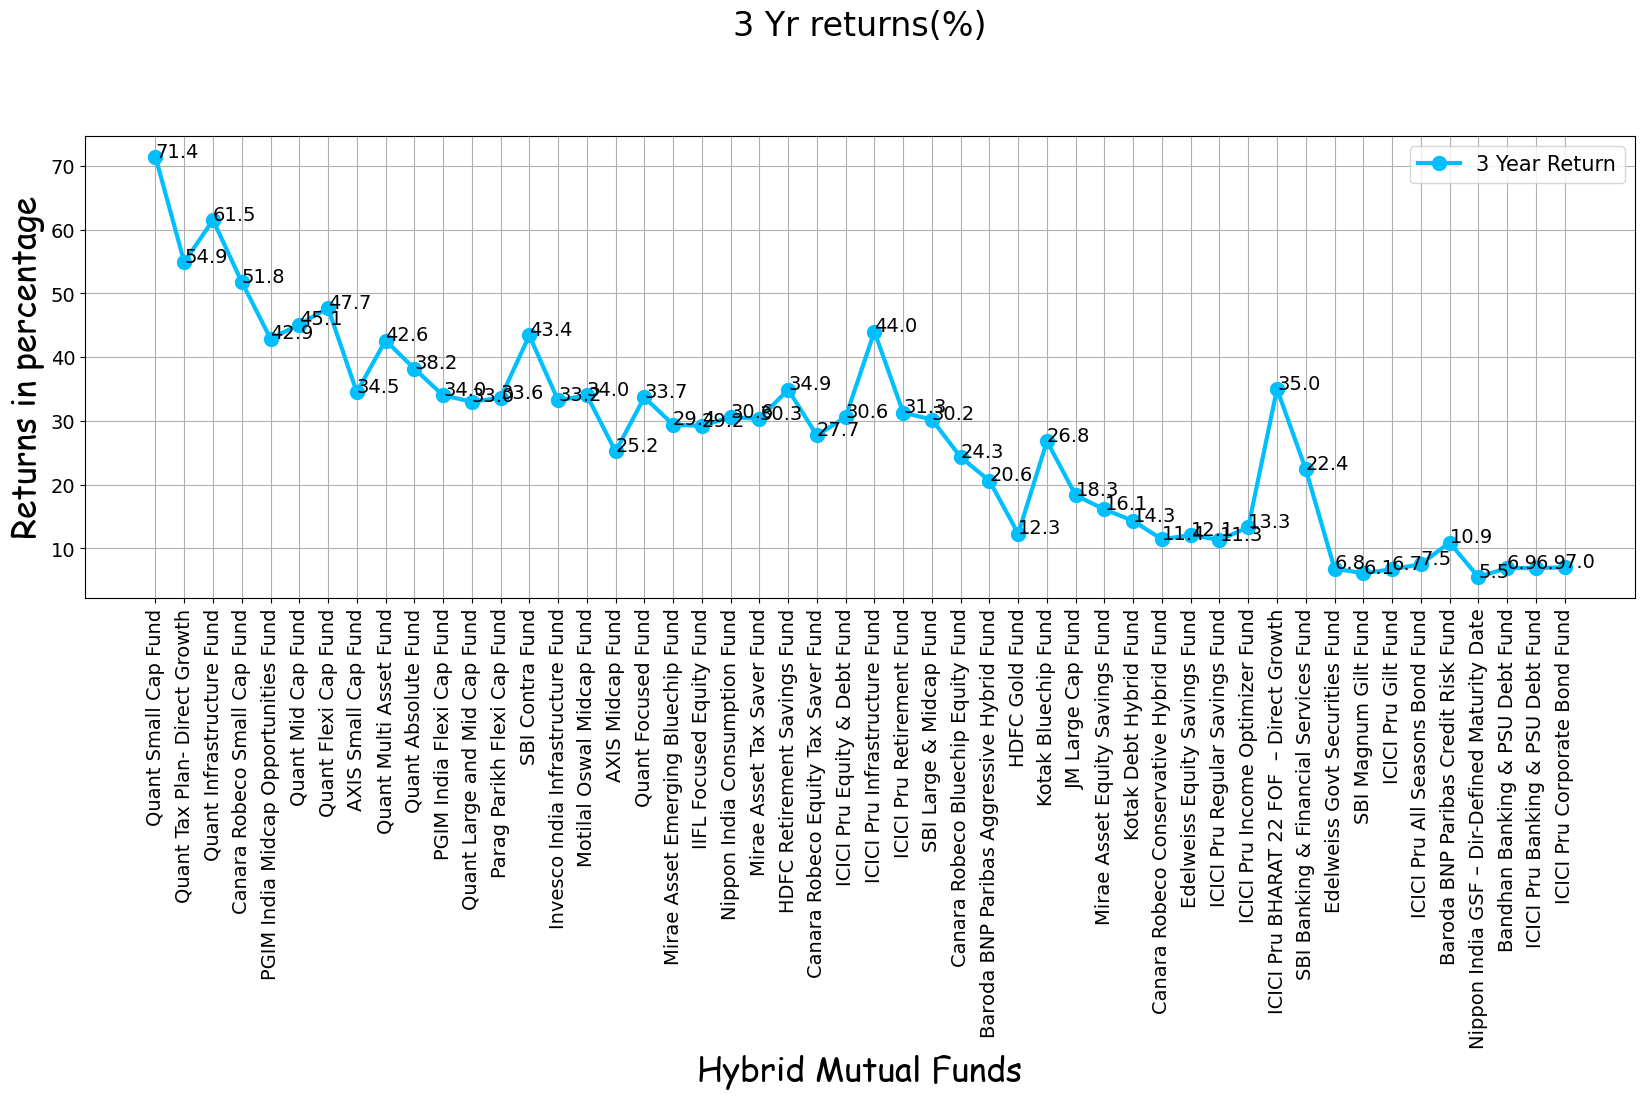

In [111]:
labels=['3 Year Return']
lines=plt.plot(X, Y, linewidth='3.0', color='deepskyblue', marker='o', markersize='10')

plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('3 Yr returns(%)', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

for i,j in zip(X,Y):
    plt.annotate(str(j),xy=(i,j))


plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

In [112]:

most_return_3_year = data['returns_3yr'].idxmax()
less_return_3_year = data['returns_3yr'].idxmin()

most_scheme_name = data.loc[most_return_3_year, 'scheme_name']
less_scheme_name = data.loc[less_return_3_year, 'scheme_name']

print("Scheme with the most return in the past year:", most_scheme_name)
print("Scheme with the least return in the past year:", less_scheme_name)


Scheme with the most return in the past year: Quant Small Cap Fund
Scheme with the least return in the past year: Sundaram Large Cap Fund


## 5 Year Return

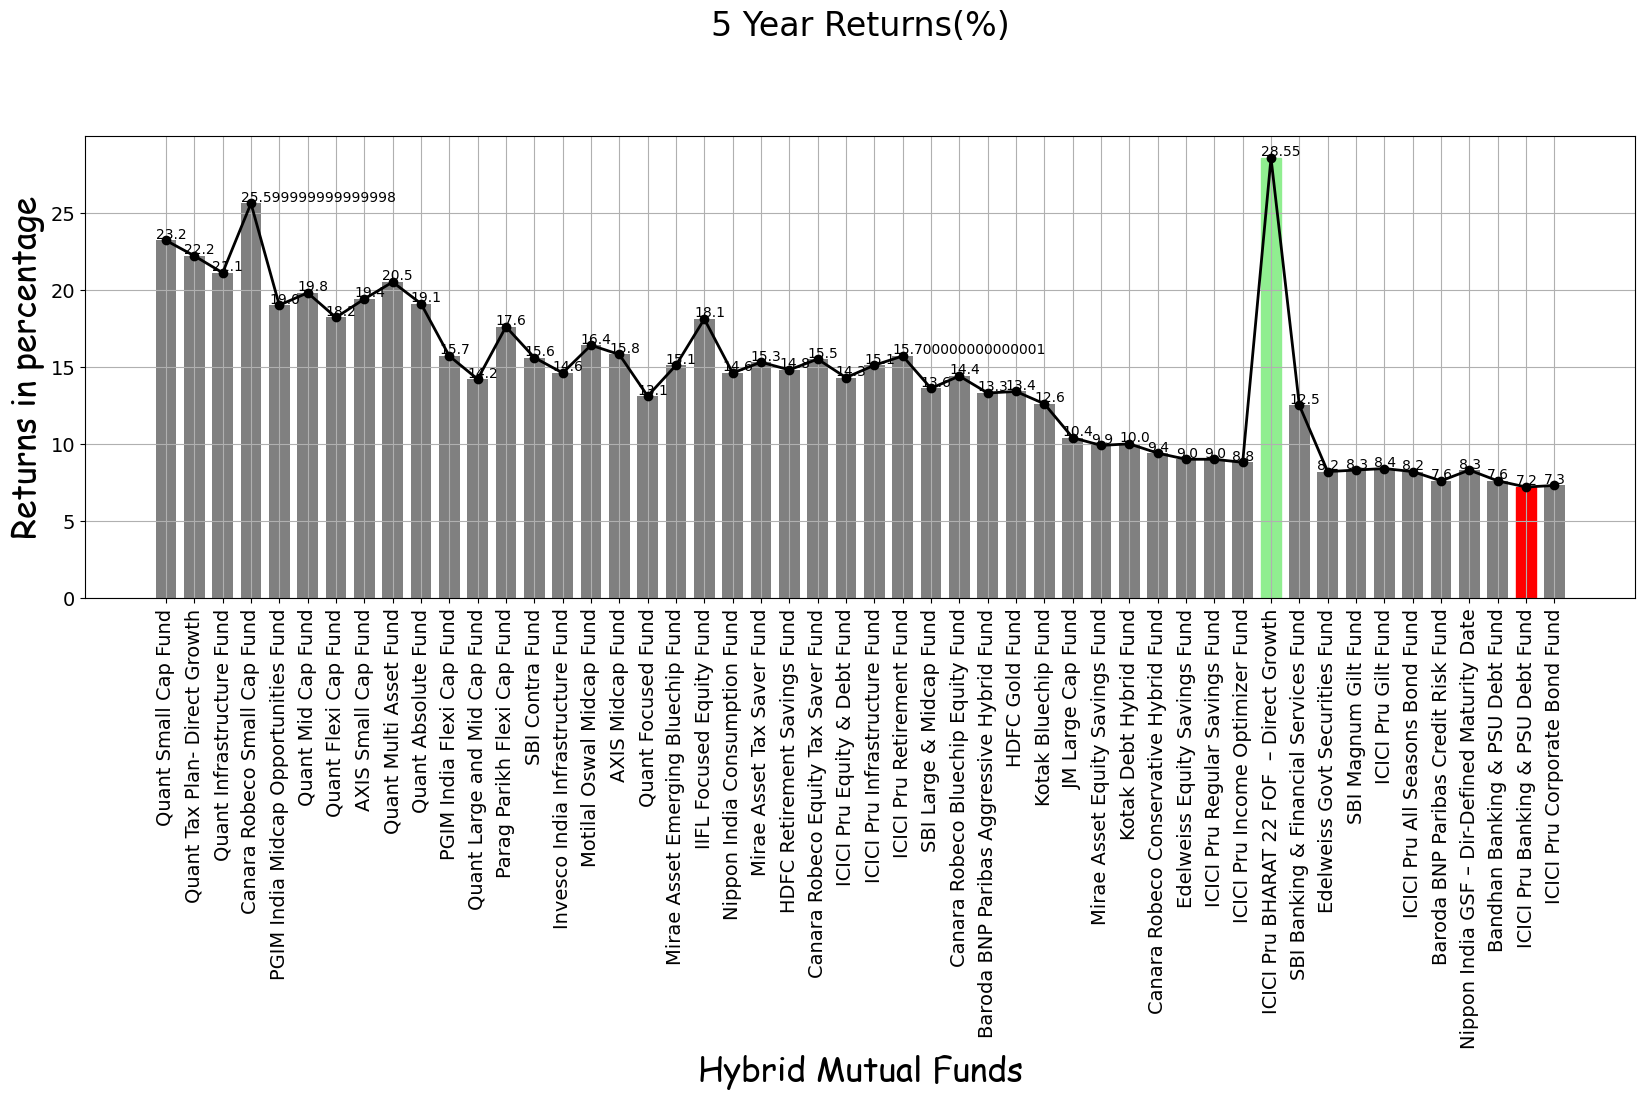

In [113]:

# Extracting data
# X = data['Fund_Scheme_Name']  # Hybrid mutual fund names
Y = data['returns_5yr'][:50]  # 5-year returns

# Creating a bar chart
bars = plt.bar(X, Y, color='grey', width=0.73)

# Customizing bar colors for min and max returns
bars[data['returns_5yr'][:50].idxmin()].set_color('red')
bars[data['returns_5yr'][:50].idxmax()].set_color('lightgreen')

# Creating a line plot
plt.plot(X, Y, linewidth=2.0, color='black', marker='o', markersize=6)

# Adding labels and title
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS")
plt.title('5 Year Returns(%)', y=1.20, fontsize=24)

# Customizing the plot
plt.grid()
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14

# Adding value labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.15, yval, fontsize=10)

# Displaying the plot
plt.show()


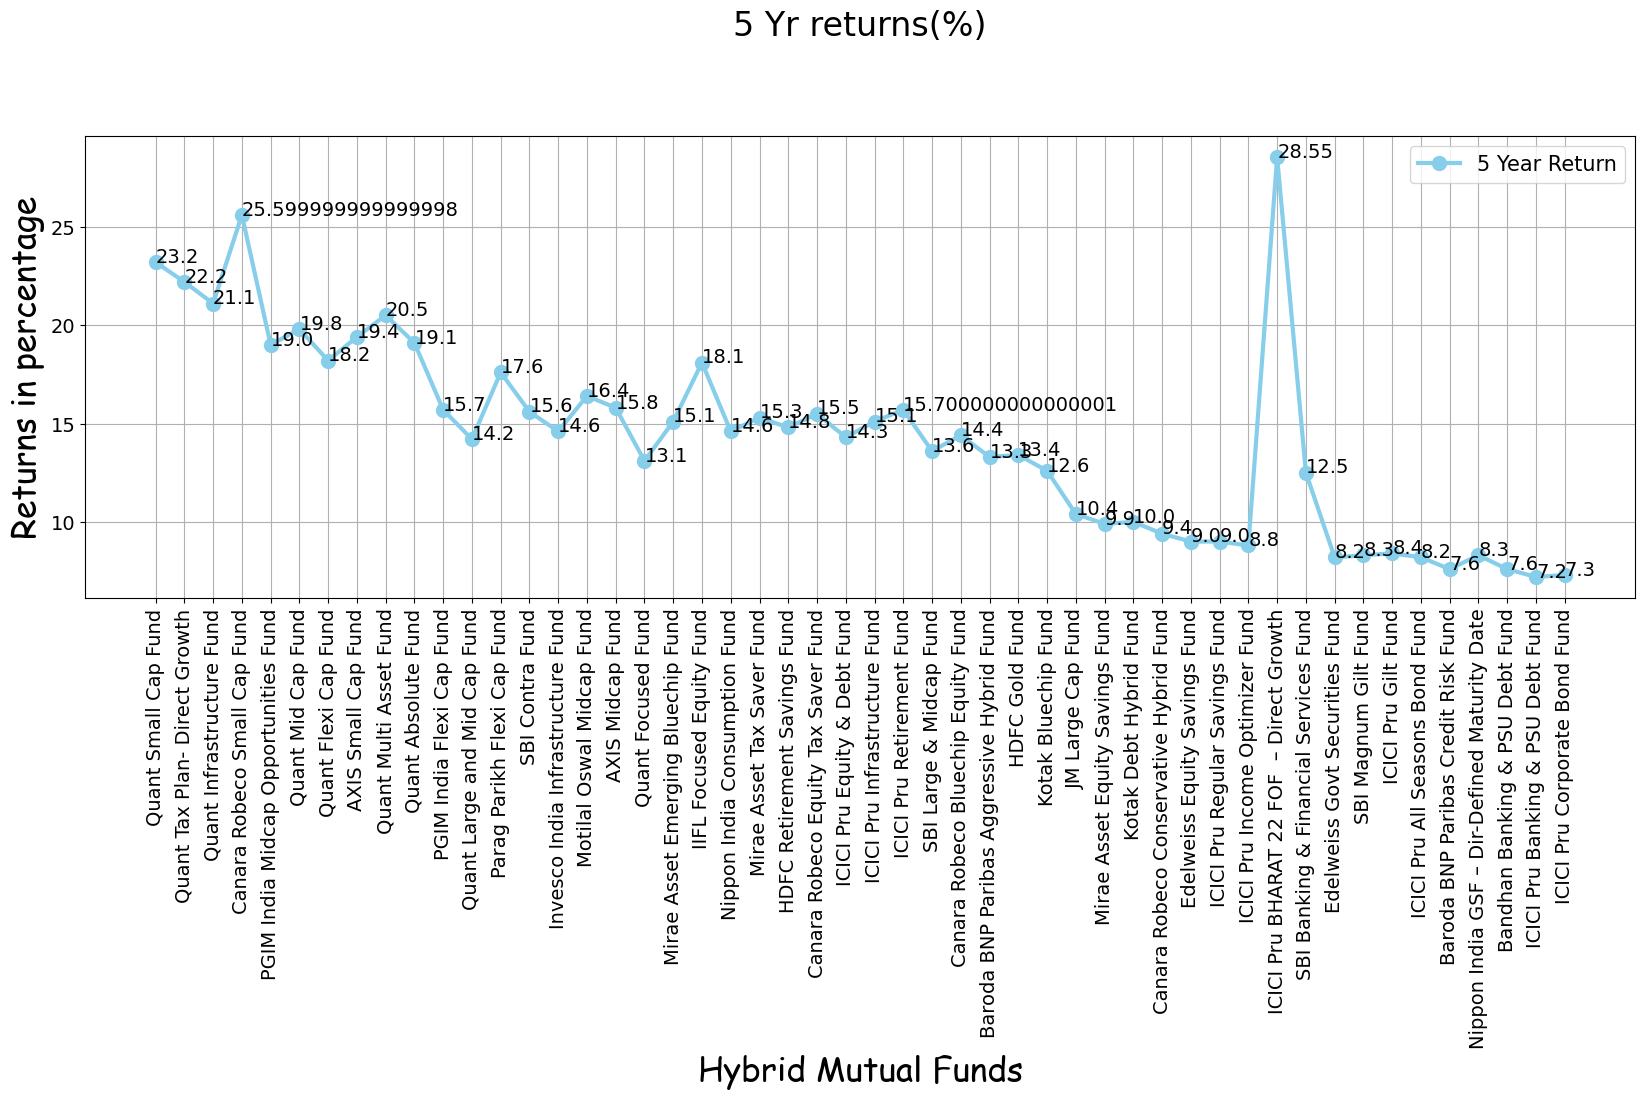

In [114]:
labels=['5 Year Return']
plt.plot(X, Y, linewidth='3.0', color='skyblue', marker='o', markersize='10')

plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('5 Yr returns(%)', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

for i,j in zip(X,Y):
    plt.annotate(str(j),xy=(i,j))


plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

In [115]:

most_return_5_year = data['returns_5yr'].idxmax()
less_return_5_year = data['returns_5yr'].idxmin()

most_scheme_name = data.loc[most_return_5_year, 'scheme_name']
less_scheme_name = data.loc[less_return_5_year, 'scheme_name']

print("Scheme with the most return in the past year:", most_scheme_name)
print("Scheme with the least return in the past year:", less_scheme_name)


Scheme with the most return in the past year: Tata Small Cap Fund
Scheme with the least return in the past year: Bank of India Credit Risk Fund


### Comparing 1yr,3yr and 5 yr returns

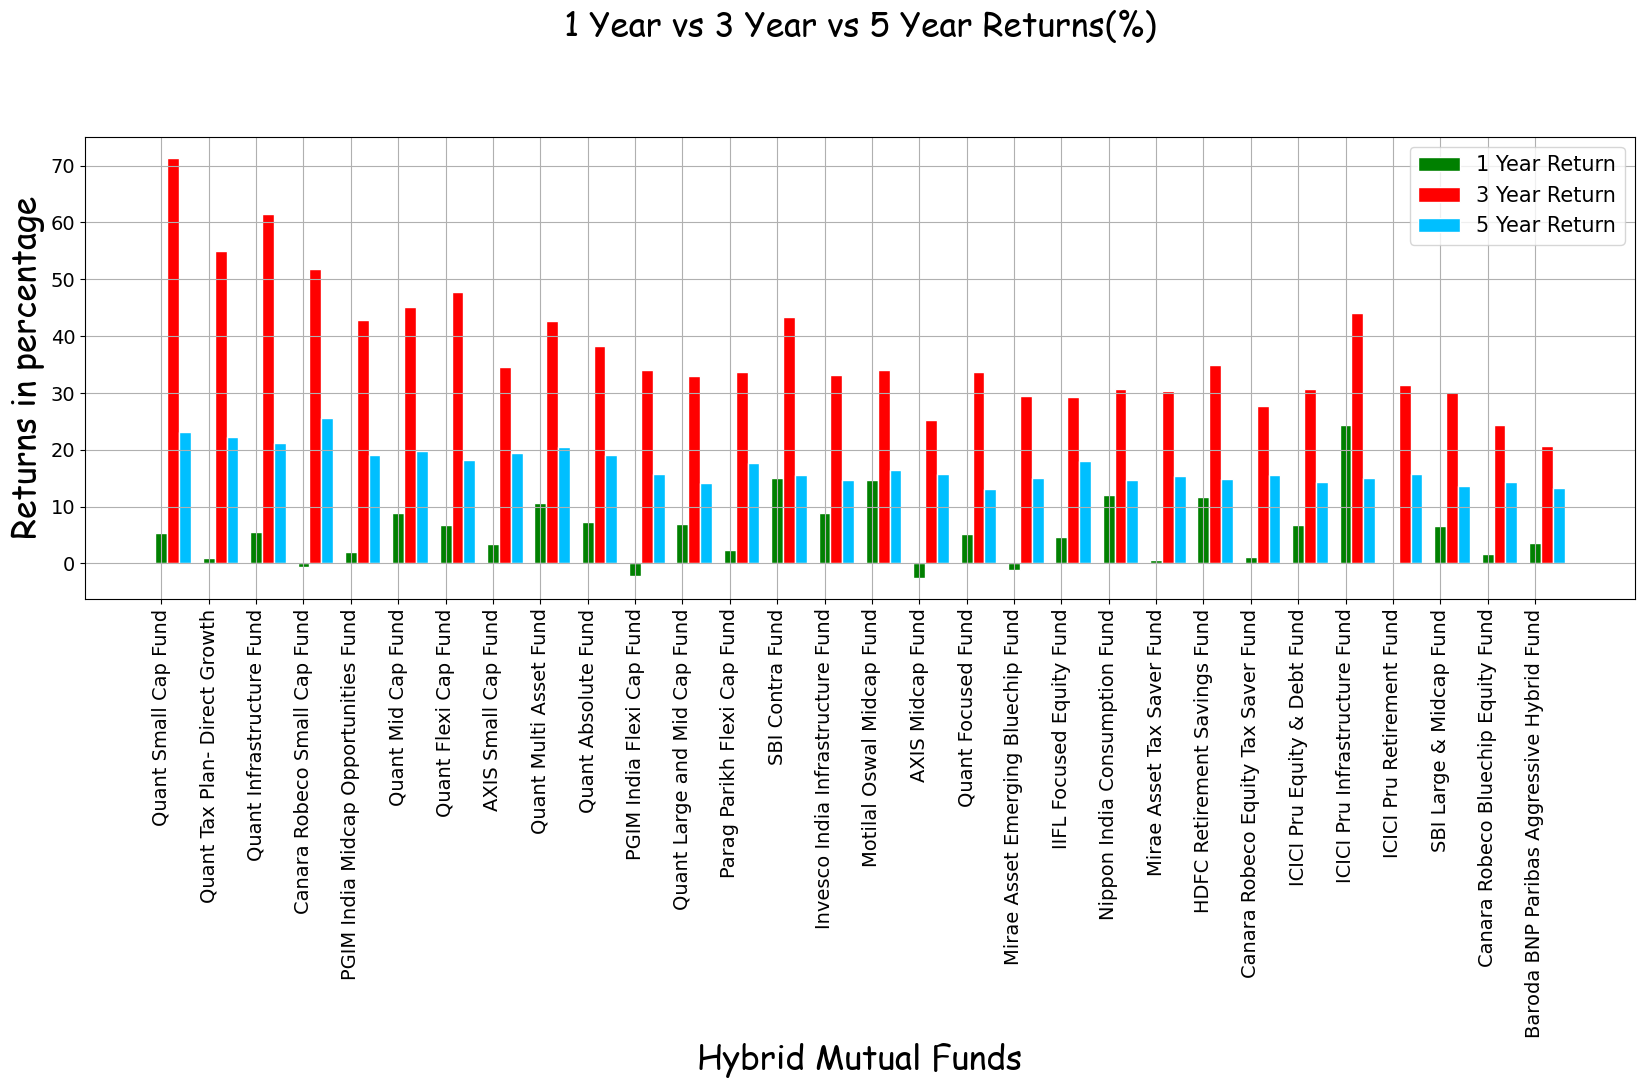

In [116]:
# Define bar width and labels
barwidth = 0.25
labels = ['1 Year Return', '3 Year Return', '5 Year Return']

# Data extraction
X = data['scheme_name'][:30]
Y1 = data['returns_1yr'][:30]
Y2 = data['returns_3yr'][:30]
Y3 = data['returns_5yr'][:30]

# Set position of bars and X axis
r1 = np.arange(len(Y1))
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]

# Create the grouped bar chart
plt.bar(r1, Y1, color='green', width=barwidth, edgecolor='white', label='1 Year Return')
plt.bar(r2, Y2, color='red', width=barwidth, edgecolor='white', label='3 Year Return')
plt.bar(r3, Y3, color='deepskyblue', width=barwidth, edgecolor='white', label='5 Year Return')

# Customize the plot add labels
plt.xlabel('Hybrid Mutual Funds', fontsize = 24, fontname = 'Comic Sans MS')
plt.ylabel('Returns in percentage', fontsize = 24, fontname = 'Comic Sans MS')
plt.xticks(r1, X,  rotation ='vertical');
plt.rcParams['figure.figsize'] = (20,6)
plt.rcParams['font.size'] = 14
plt.grid()
plt.title('1 Year vs 3 Year vs 5 Year Returns(%)',y=1.20,fontsize=24,fontname="Comic Sans MS")
plt.legend(labels, loc='upper right',bbox_to_anchor=(1.0,1.0),fontsize=15)

plt.show()

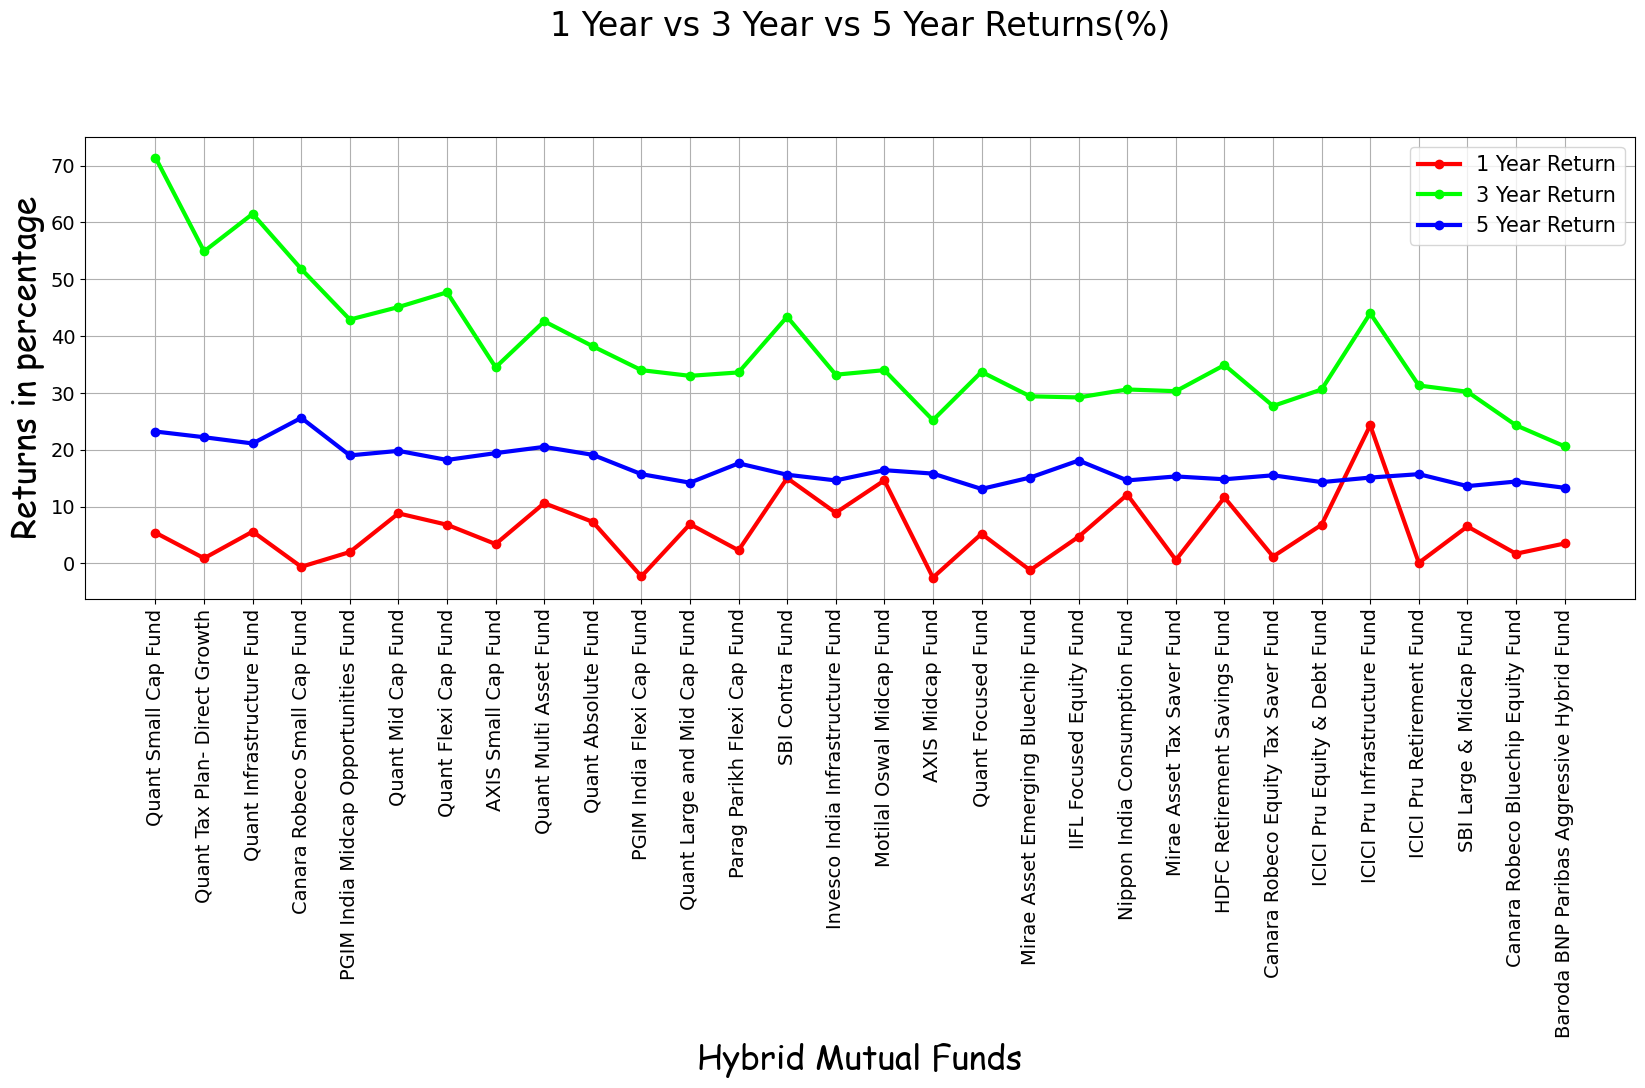

In [117]:

# Create line plots for each year
plt.plot(X, Y1, linewidth=3.0, color='red', marker='o', markersize=6, label='1 Year Return')
plt.plot(X, Y2, linewidth=3.0, color='lime', marker='o', markersize=6, label='3 Year Return')
plt.plot(X, Y3, linewidth=3.0, color='blue', marker='o', markersize=6, label='5 Year Return')

# Customize the plot
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS")
plt.title('1 Year vs 3 Year vs 5 Year Returns(%)', y=1.20, fontsize=24)
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

# Customize figure size and font size
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14

# Display the plot
plt.show()


In [118]:
import pandas as pd

# Sample data (replace this with your own data)
data = pd.DataFrame({
    'scheme_name': data['scheme_name'],
    'returns_1yr': data['returns_1yr'],
    'returns_3yr': data['returns_3yr'],
    'returns_5yr': data['returns_5yr']
})

# Calculate the indices for maximum and minimum returns for 1 year
most_return_1_year = data['returns_1yr'].idxmax()
less_return_1_year = data['returns_1yr'].idxmin()

# Retrieve the scheme names associated with the indices for 1 year
most_scheme_name_1yr = data.loc[most_return_1_year, 'scheme_name']
less_scheme_name_1yr = data.loc[less_return_1_year, 'scheme_name']

# Calculate the indices for maximum and minimum returns for 3 years
most_return_3_year = data['returns_3yr'].idxmax()
less_return_3_year = data['returns_3yr'].idxmin()

# Retrieve the scheme names associated with the indices for 3 years
most_scheme_name_3yr = data.loc[most_return_3_year, 'scheme_name']
less_scheme_name_3yr = data.loc[less_return_3_year, 'scheme_name']

# Calculate the indices for maximum and minimum returns for 5 years
most_return_5_year = data['returns_5yr'].idxmax()
less_return_5_year = data['returns_5yr'].idxmin()

# Retrieve the scheme names associated with the indices for 5 years
most_scheme_name_5yr = data.loc[most_return_5_year, 'scheme_name']
less_scheme_name_5yr = data.loc[less_return_5_year, 'scheme_name']

# Display the results
print("1-Year Analysis:")
print("Scheme with the most return in the past year:", most_scheme_name_1yr)
print("Scheme with the least return in the past year:", less_scheme_name_1yr)

print("\n3-Year Analysis:")
print("Scheme with the most return in the past 3 years:", most_scheme_name_3yr)
print("Scheme with the least return in the past 3 years:", less_scheme_name_3yr)

print("\n5-Year Analysis:")
print("Scheme with the most return in the past 5 years:", most_scheme_name_5yr)
print("Scheme with the least return in the past 5 years:", less_scheme_name_5yr)


1-Year Analysis:
Scheme with the most return in the past year: Bank of India Credit Risk Fund
Scheme with the least return in the past year: AXIS Focused 25 Fund

3-Year Analysis:
Scheme with the most return in the past 3 years: Quant Small Cap Fund
Scheme with the least return in the past 3 years: Sundaram Large Cap Fund

5-Year Analysis:
Scheme with the most return in the past 5 years: Tata Small Cap Fund
Scheme with the least return in the past 5 years: Bank of India Credit Risk Fund


In [119]:
data.columns.tolist()

['scheme_name', 'returns_1yr', 'returns_3yr', 'returns_5yr']

### Now lets distinguish Good and bad schemes


for this we will take out median and then if the value is above the barrier value then only its good schemes

In [133]:
import numpy as np

# Assuming 'data' is a DataFrame with columns 'rating', 'returns_1yr', 'returns_3yr', 'returns_5yr'

def score(parameter_name, values):
    median_value = np.nanmedian(values)
    print(f'{parameter_name} : {median_value}')

score('rating', data['rating'])
score('returns_1yr', data['returns_1yr'])
score('returns_3yr', data['returns_3yr'])
score('returns_5yr', data['returns_5yr'])


rating : 3.0
returns_1yr : 4.4
returns_3yr : 14.0
returns_5yr : 8.0


### Distinguished between Good and bad schemes

For determining best parameter lets take help of .corr() coorelation function and also read some insights also of parameter and then only decide


#### Give the good scheme 1 if it satisfy the condition

In [172]:

# # Apply conditions to label 'Good' schemes
# data.loc[(data['returns_1yr'] >= 4.4) & (data['returns_3yr'] >= 14.0) & (data['returns_5yr'] >= 8.0) & (data['rating'] >= 3.0), 'Good'] = 1

# # Print the resulting DataFrame
# data['Good'].value_counts().to_dict()
# good_schemes = data[data['Good']==1].index

# location = data.loc[good_schemes,'scheme_name']

# list(location)

In [161]:
# Filtering good and bad based on above conditions

for index, row in data.iterrows():
    A=row['rating']
    B=row['returns_1yr']
    C=row['returns_3yr']
    D=row['returns_5yr']
    E=row['scheme_name']
    
     
    if (B>=4.4 and C>=14.0 and D>=8.0 and A>=3.0): 
    # if (B>=0 and C>=0 and D>=0 and A>=0):    
        
        # data['Good']=1
        print(E)
        data.loc[index, 'Good'] = 1
    else:
        data.loc[index, 'Good'] = 0

Quant Small Cap Fund
Quant Infrastructure Fund
Quant Mid Cap Fund
Quant Flexi Cap Fund
Quant Multi Asset Fund
Quant Absolute Fund
Quant Large and Mid Cap Fund
SBI Contra Fund
Invesco India Infrastructure Fund
Motilal Oswal Midcap Fund
Quant Focused Fund
IIFL Focused Equity Fund
Nippon India Consumption Fund
HDFC Retirement Savings Fund
ICICI Pru Equity & Debt Fund
ICICI Pru Infrastructure Fund
SBI Large & Midcap Fund
Kotak Debt Hybrid Fund
ICICI Pru BHARAT 22 FOF  – Direct Growth
SBI Banking & Financial Services Fund
Aditya Birla SL Medium Term Plan – Direct Growth
Parag Parikh Tax Saver Fund
ICICI Pru India Equity FOF – Direct Growth
Nippon India Small Cap Fund
Tata Small Cap Fund
SBI Small Cap Fund
SBI Magnum Midcap Fund
Kotak Emerging Equity Fund
Edelweiss Mid Cap Fund
Bank of India Manufacturing & Infrastr Fund
Nippon India Growth Fund
Nippon India Growth Fund
ICICI Pru Value Discovery Fund
SBI Consumption Opportunities Fund
ICICI Pru Multi-Asset Fund
Kotak Infrastructure & Ecoc. R

In [168]:
category=data['Good'].unique().tolist()
# converin categories to list
category_frequency = data['Good'].value_counts().to_dict()
# converting category_frequency to dictionary

def getList(category_frequency): 
    list = [] 
    for value in category_frequency.values(): 
        list.append(value) 
          
    return list          # returns list
      
category_count=getList(category_frequency)

### Percentage of Good and Bad schemes:

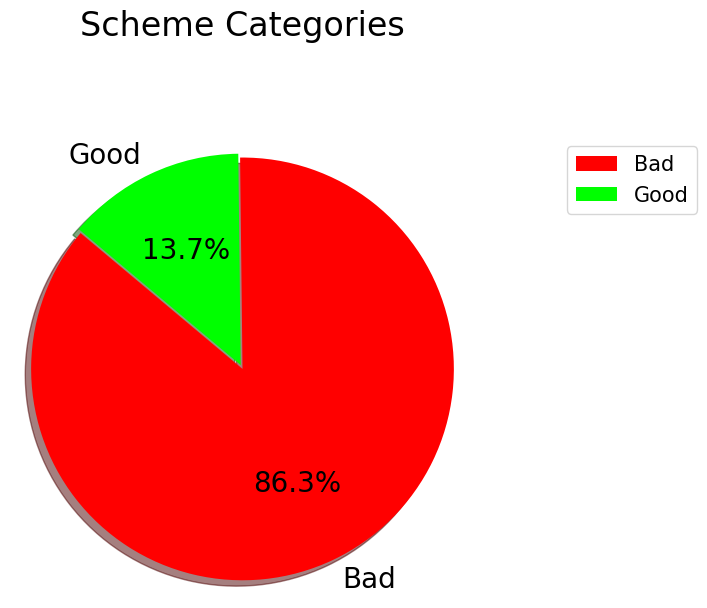

In [164]:
labels = ['Bad', 'Good']
colors = ['red', 'lime']
explode = (0.01, 0.01)  


plt.pie(category_count, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140, autopct='%1.1f%%')
plt.title('Scheme Categories', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.5,1.0), fontsize=15)
plt.axis('equal')
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['font.size'] = 20
plt.show()

In [167]:
category=data['Good'].unique().tolist()
# converin categories to list
category_frequency = data['Good'].value_counts().to_dict()
# converting category_frequency to dictionary

category_frequency

{0: 661, 1: 105}

### Printing the scheme name which qualify the criteria and considered as good schemes

In [173]:
good_schemes = data[data['Good'] == 1]['scheme_name']

# Export the 'scheme_name' of 'Good' rows to an Excel file
output_path = 'good_schemes.xlsx'
good_schemes.to_excel(output_path, index=False, header=True)